In [ ]:
#Preparação do ambiente
!pip install pandas
!pip install matplotlib

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt

In [ ]:
#Criação do DF
df_supply_chain = pd.read_csv('/content/drive/MyDrive/Datasets/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

In [ ]:
#Converte as datas de objeto para datetime
df_supply_chain['shipping date (DateOrders)'] = pd.to_datetime(df_supply_chain['shipping date (DateOrders)'], format = '%m/%d/%Y %H:%M')
df_supply_chain['order date (DateOrders)'] = pd.to_datetime(df_supply_chain['shipping date (DateOrders)'], format='%m/%d/%Y %H:%M')

#Cria uma nova coluna para dia, mês e ano dos pedidos
df_supply_chain['order_day'] = pd.DatetimeIndex(df_supply_chain['order date (DateOrders)']).day
df_supply_chain['order_month'] = pd.DatetimeIndex(df_supply_chain['order date (DateOrders)']).month
df_supply_chain['order_year'] = pd.DatetimeIndex(df_supply_chain['order date (DateOrders)']).year

## Perguntas de negócio:
Quais os modos de envio que mais atrasam as entregas?
Quais países atrasam mais os pedidos?
Descobrir a porcentagem de pedidos entregues dentro do prazo
Estatísticas dos pedidos fora do prazo

Text(0.5, 0, 'Tipo de envio')

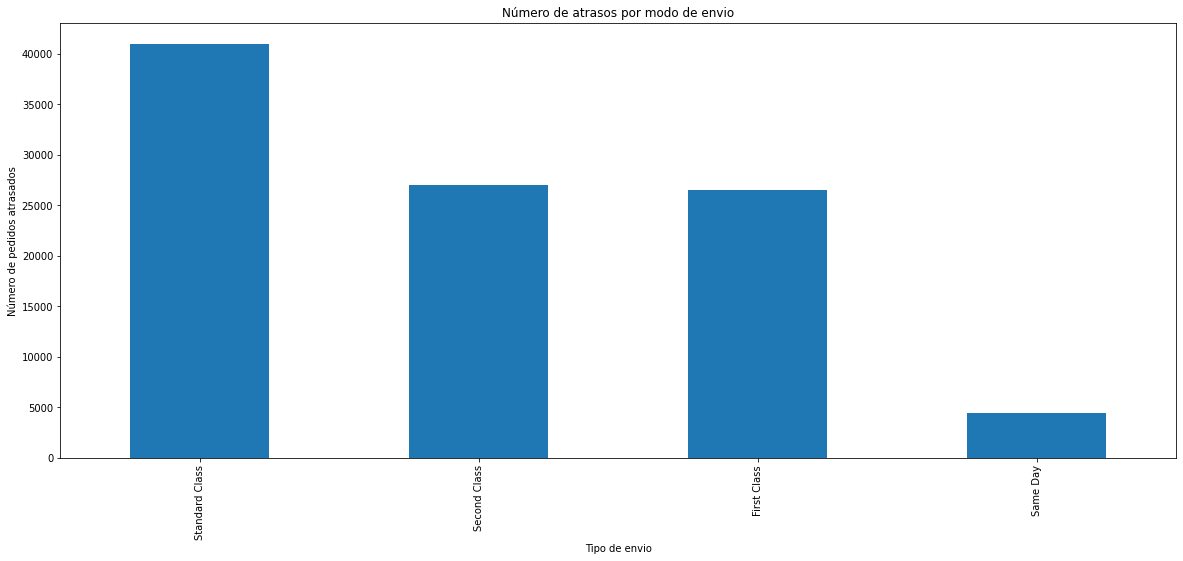

In [ ]:
#Quais os modos de envio que mais atrasam as entregas?

#Crio um dataset somente com as linhas em que as entregas atrasaram
df_pedidos_atrasados = df_supply_chain[df_supply_chain['Delivery Status'] == 'Late delivery']

#Crio um gráfico que conta o número de atrasos para cada tipo de envio
ax = df_pedidos_atrasados['Shipping Mode'].value_counts().plot.bar(figsize=(20,8), title="Número de atrasos por modo de envio")
ax.set_ylabel("Número de pedidos atrasados")
ax.set_xlabel("Tipo de envio")


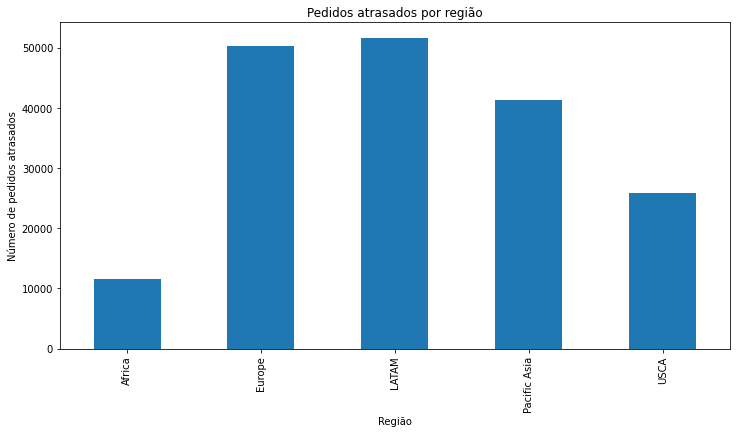

In [ ]:
#Em quais regiões do mundo houve mais entregas atrasadas?

#Agrupo os pedidos por região do mundo
df_pedidos_por_regiao = df_supply_chain.groupby('Market')['Order Id'].count()

#Ploto o gráfico
ax = df_pedidos_por_regiao.plot.bar(figsize=(12,6))
ax.set_title('Pedidos atrasados por região')
ax.set_xlabel('Região')
ax.set_ylabel('Número de pedidos atrasados')
plt.show()

In [ ]:
#Estatísticas dos produtos atrasados

#Descobre a diferença entre a entrega real com a prevista. Se >=0, fora do prazo, se <0, no prazo
df_supply_chain['Forecast_Diff'] = df_supply_chain['Days for shipping (real)'] - df_supply_chain['Days for shipment (scheduled)']

#Cria um DF com os pedidos fora de previsão
df_fora_da_previsão = df_supply_chain[df_supply_chain['Forecast_Diff'] > 0]

#Remove as colunas não necessárias
df_fora_da_previsão = df_fora_da_previsão.loc[:, ['Forecast_Diff']]

#Mostra dados estatísticos do DF
df_fora_da_previsão.describe()

,Forecast_Diff
count,103400.000000
mean,1.616741
std,0.882034
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


In [ ]:
#Descobrir a porcentagem de pedidos entregues dentro do prazo

#Conta o total de linhas
total_pedidos = df_supply_chain.shape[0]

#Conta quantos pedidos foram entregues dentro do prazo
total_dentro_do_prazo = (df_supply_chain[df_supply_chain['Days for shipping (real)'] <= df_supply_chain['Days for shipment (scheduled)']]).shape[0]

#Cálculo da porcentagem
porcentagem_dentro_do_prazo = (total_dentro_do_prazo / total_pedidos) * 100

#Porcentagem formatada
print(f'A porcentagem de pedidos entregues dentro do prazo é {porcentagem_dentro_do_prazo:.02f} %')


A porcentagem de pedidos entregues dentro do prazo é 42.72 %
